In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir ~/.kaggle/

In [ ]:
!cp '/content/drive/MyDrive/Colab Notebooks/kaggle/kaggle.json' ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list

In [ ]:
!kaggle datasets download -d uniabhi/bigmart-sales-data

bigmart-sales-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip /content/bigmart-sales-data.zip -d bigmart-sales

Archive:  /content/bigmart-sales-data.zip
  inflating: bigmart-sales/Test.csv  
  inflating: bigmart-sales/Train.csv  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , Ridge , Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
plt.style.use('ggplot')
# pd.set_option('max_columns', 200)


**Train EDA &** **prerpocessing**

In [ ]:
df = pd.read_csv('/content/bigmart-sales/Train.csv')
df.sample(5)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
6587,FDW13,8.500,low fat,0.163839,Canned,51.3324,OUT010,1998,NaN,Tier 3,Grocery Store,311.5944
2478,NCV06,11.300,Low Fat,0.066817,Household,192.2478,OUT045,2002,NaN,Tier 2,Supermarket Type1,1356.2346
3309,FDT14,10.695,Regular,0.127727,Dairy,121.1440,OUT046,1997,Small,Tier 1,Supermarket Type1,1917.5040
6779,FDH45,NaN,Regular,0.185009,Fruits and Vegetables,42.3796,OUT019,1985,Small,Tier 1,Grocery Store,123.8388
478,FDM24,6.135,Regular,0.000000,Baking Goods,151.3366,OUT045,2002,NaN,Tier 2,Supermarket Type1,1057.9562


In [ ]:
df = df[[
    # 'Item_Identifier',
    'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type',
    'Item_MRP',
    #  'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size',
     'Outlet_Location_Type', 'Outlet_Type',
    'Item_Outlet_Sales'
    ]].copy()

In [ ]:
df.shape

(8523, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Size                6113 non-null   object 
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 666.0+ KB


In [ ]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
df.dtypes

Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [ ]:
df.loc[df.duplicated()]

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [ ]:
# find duplicated value
df.duplicated().sum()

0

In [ ]:
# find of data null for clean datd
df.isna().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
# fillna for data (Replace NaN values with a constant value)
df['Item_Weight'].fillna(df['Item_Weight'].median(), inplace=True)
df['Outlet_Size'] = df['Outlet_Size'].fillna(value='no_null')
df.isnull().sum()
df.shape
df.sample(5)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
4165,12.600,Regular,0.039032,Snack Foods,95.6410,1985,Medium,Tier 3,Supermarket Type3,1737.7380
7005,10.100,Low Fat,0.279784,Soft Drinks,241.8512,1998,no_null,Tier 3,Grocery Store,484.7024
3463,8.185,Low Fat,0.038722,Fruits and Vegetables,115.8808,2004,Small,Tier 2,Supermarket Type1,1523.3504
7745,7.600,reg,0.142700,Starchy Foods,171.7448,2002,no_null,Tier 2,Supermarket Type1,4431.5648
5201,16.000,Regular,0.173109,Snack Foods,155.2972,2002,no_null,Tier 2,Supermarket Type1,3894.9300


In [ ]:
df['Item_Fat_Content']=df['Item_Fat_Content'].replace({"LF":"Low Fat", "reg":"Regular", "low fat":"Low Fat"})
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [ ]:
df['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [ ]:
# Feature Engineering (One hot encoding)
df['Item_Fat_Content']= pd.get_dummies(df['Item_Fat_Content'], drop_first=True) #there is no class one
df.sample(5)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
6249,19.1,0,0.067570,Household,43.0796,2009,Medium,Tier 3,Supermarket Type2,619.1940
804,16.1,1,0.024928,Fruits and Vegetables,95.1410,1987,High,Tier 3,Supermarket Type1,3089.3120
633,12.6,1,0.000000,Frozen Foods,145.2102,1985,Small,Tier 1,Grocery Store,437.4306
4766,17.2,1,0.025162,Canned,145.9418,2004,Small,Tier 2,Supermarket Type1,1765.7016
2072,18.6,0,0.015767,Snack Foods,152.9366,2004,Small,Tier 2,Supermarket Type1,1662.5026


In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['Outlet_Type'] = encoder.fit_transform(df['Outlet_Type'])
df['Outlet_Size'] = encoder.fit_transform(df['Outlet_Size'])
df['Outlet_Location_Type'] = encoder.fit_transform(df['Outlet_Location_Type'])
df['Item_Type'] = encoder.fit_transform(df['Item_Type'])
df.describe()
df.sample(10)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
392,18.00,1,0.142689,6,88.5514,1997,2,0,1,796.9626
8145,12.60,0,0.026933,10,78.4670,1985,1,2,3,3292.3810
5177,12.60,1,0.075384,0,262.7568,1985,1,2,3,7646.0472
2742,12.60,0,0.016956,8,109.3228,1985,1,2,3,2431.5016
5875,12.60,1,0.127109,4,120.7440,1985,1,2,3,2756.4120
770,12.60,0,0.063750,3,153.4682,1985,1,2,3,2287.0230
6915,12.60,0,0.142728,8,95.1410,1985,1,2,3,2510.0660
716,17.35,1,0.146896,12,149.6050,2009,1,2,2,3745.1250
3473,16.35,0,0.016979,9,97.4410,1987,0,2,1,772.3280
2330,15.20,0,0.000000,8,47.8034,1999,1,0,1,437.4306


**data preprocessing**


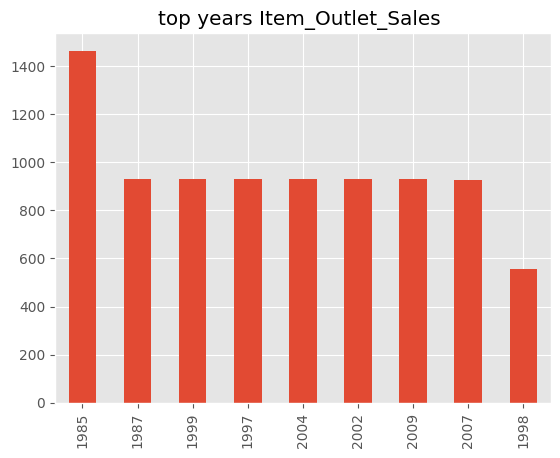

In [ ]:
ax = df["Outlet_Establishment_Year"].value_counts() \
  .plot(kind = 'bar', title = 'top years Item_Outlet_Sales ')
  # ax.set_xlabels('Outlet_Establishment_Year')
  # ax.set_ylabels('count')


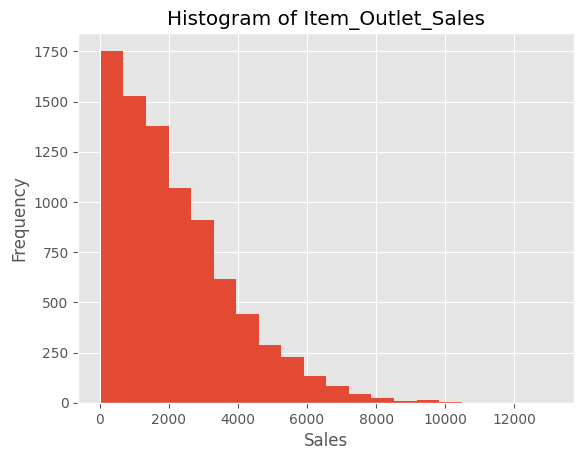

In [ ]:
ax = df['Item_Outlet_Sales'].plot(kind='hist', bins=20)
ax.set_title('Histogram of Item_Outlet_Sales')
ax.set_xlabel('Sales')
plt.show()

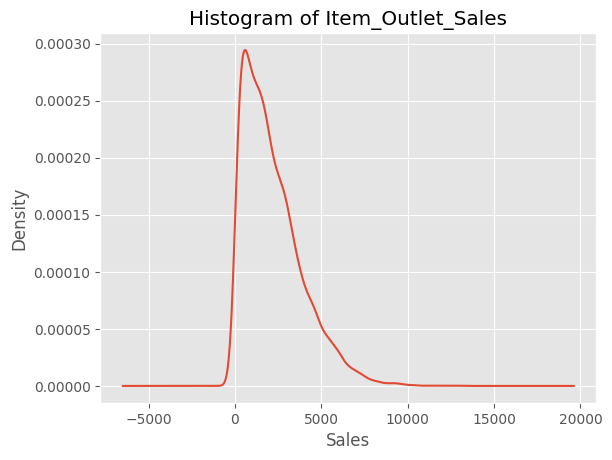

In [ ]:
ax = df['Item_Outlet_Sales'].plot(kind='kde')
ax.set_title('Histogram of Item_Outlet_Sales')
ax.set_xlabel('Sales')
plt.show()

##feactur relationship
Scaterplot

Heatmap corrolation

Pairplot

Groupby comparisens

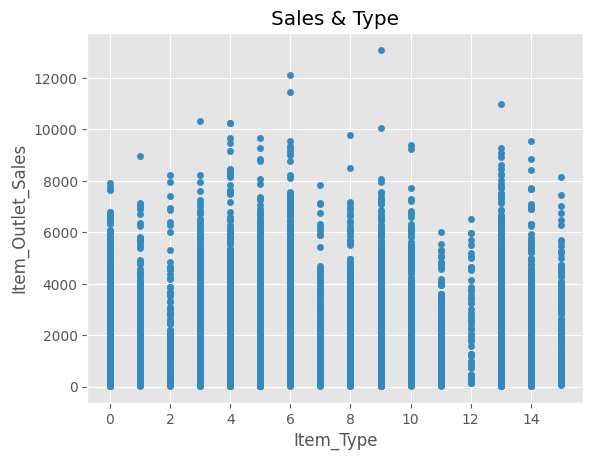

In [ ]:
ax = df.plot(kind='scatter', y='Item_Outlet_Sales', x='Item_Type')
ax.set_title('Sales & Type')
plt.show()

<Axes: xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

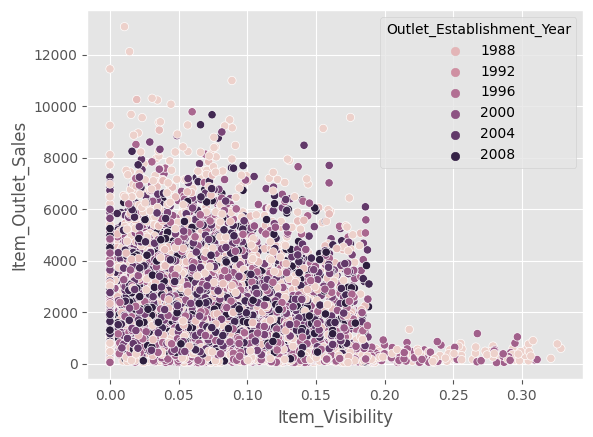

In [ ]:
sns.scatterplot( y='Item_Outlet_Sales', x='Item_Visibility', hue='Outlet_Establishment_Year', data=df)

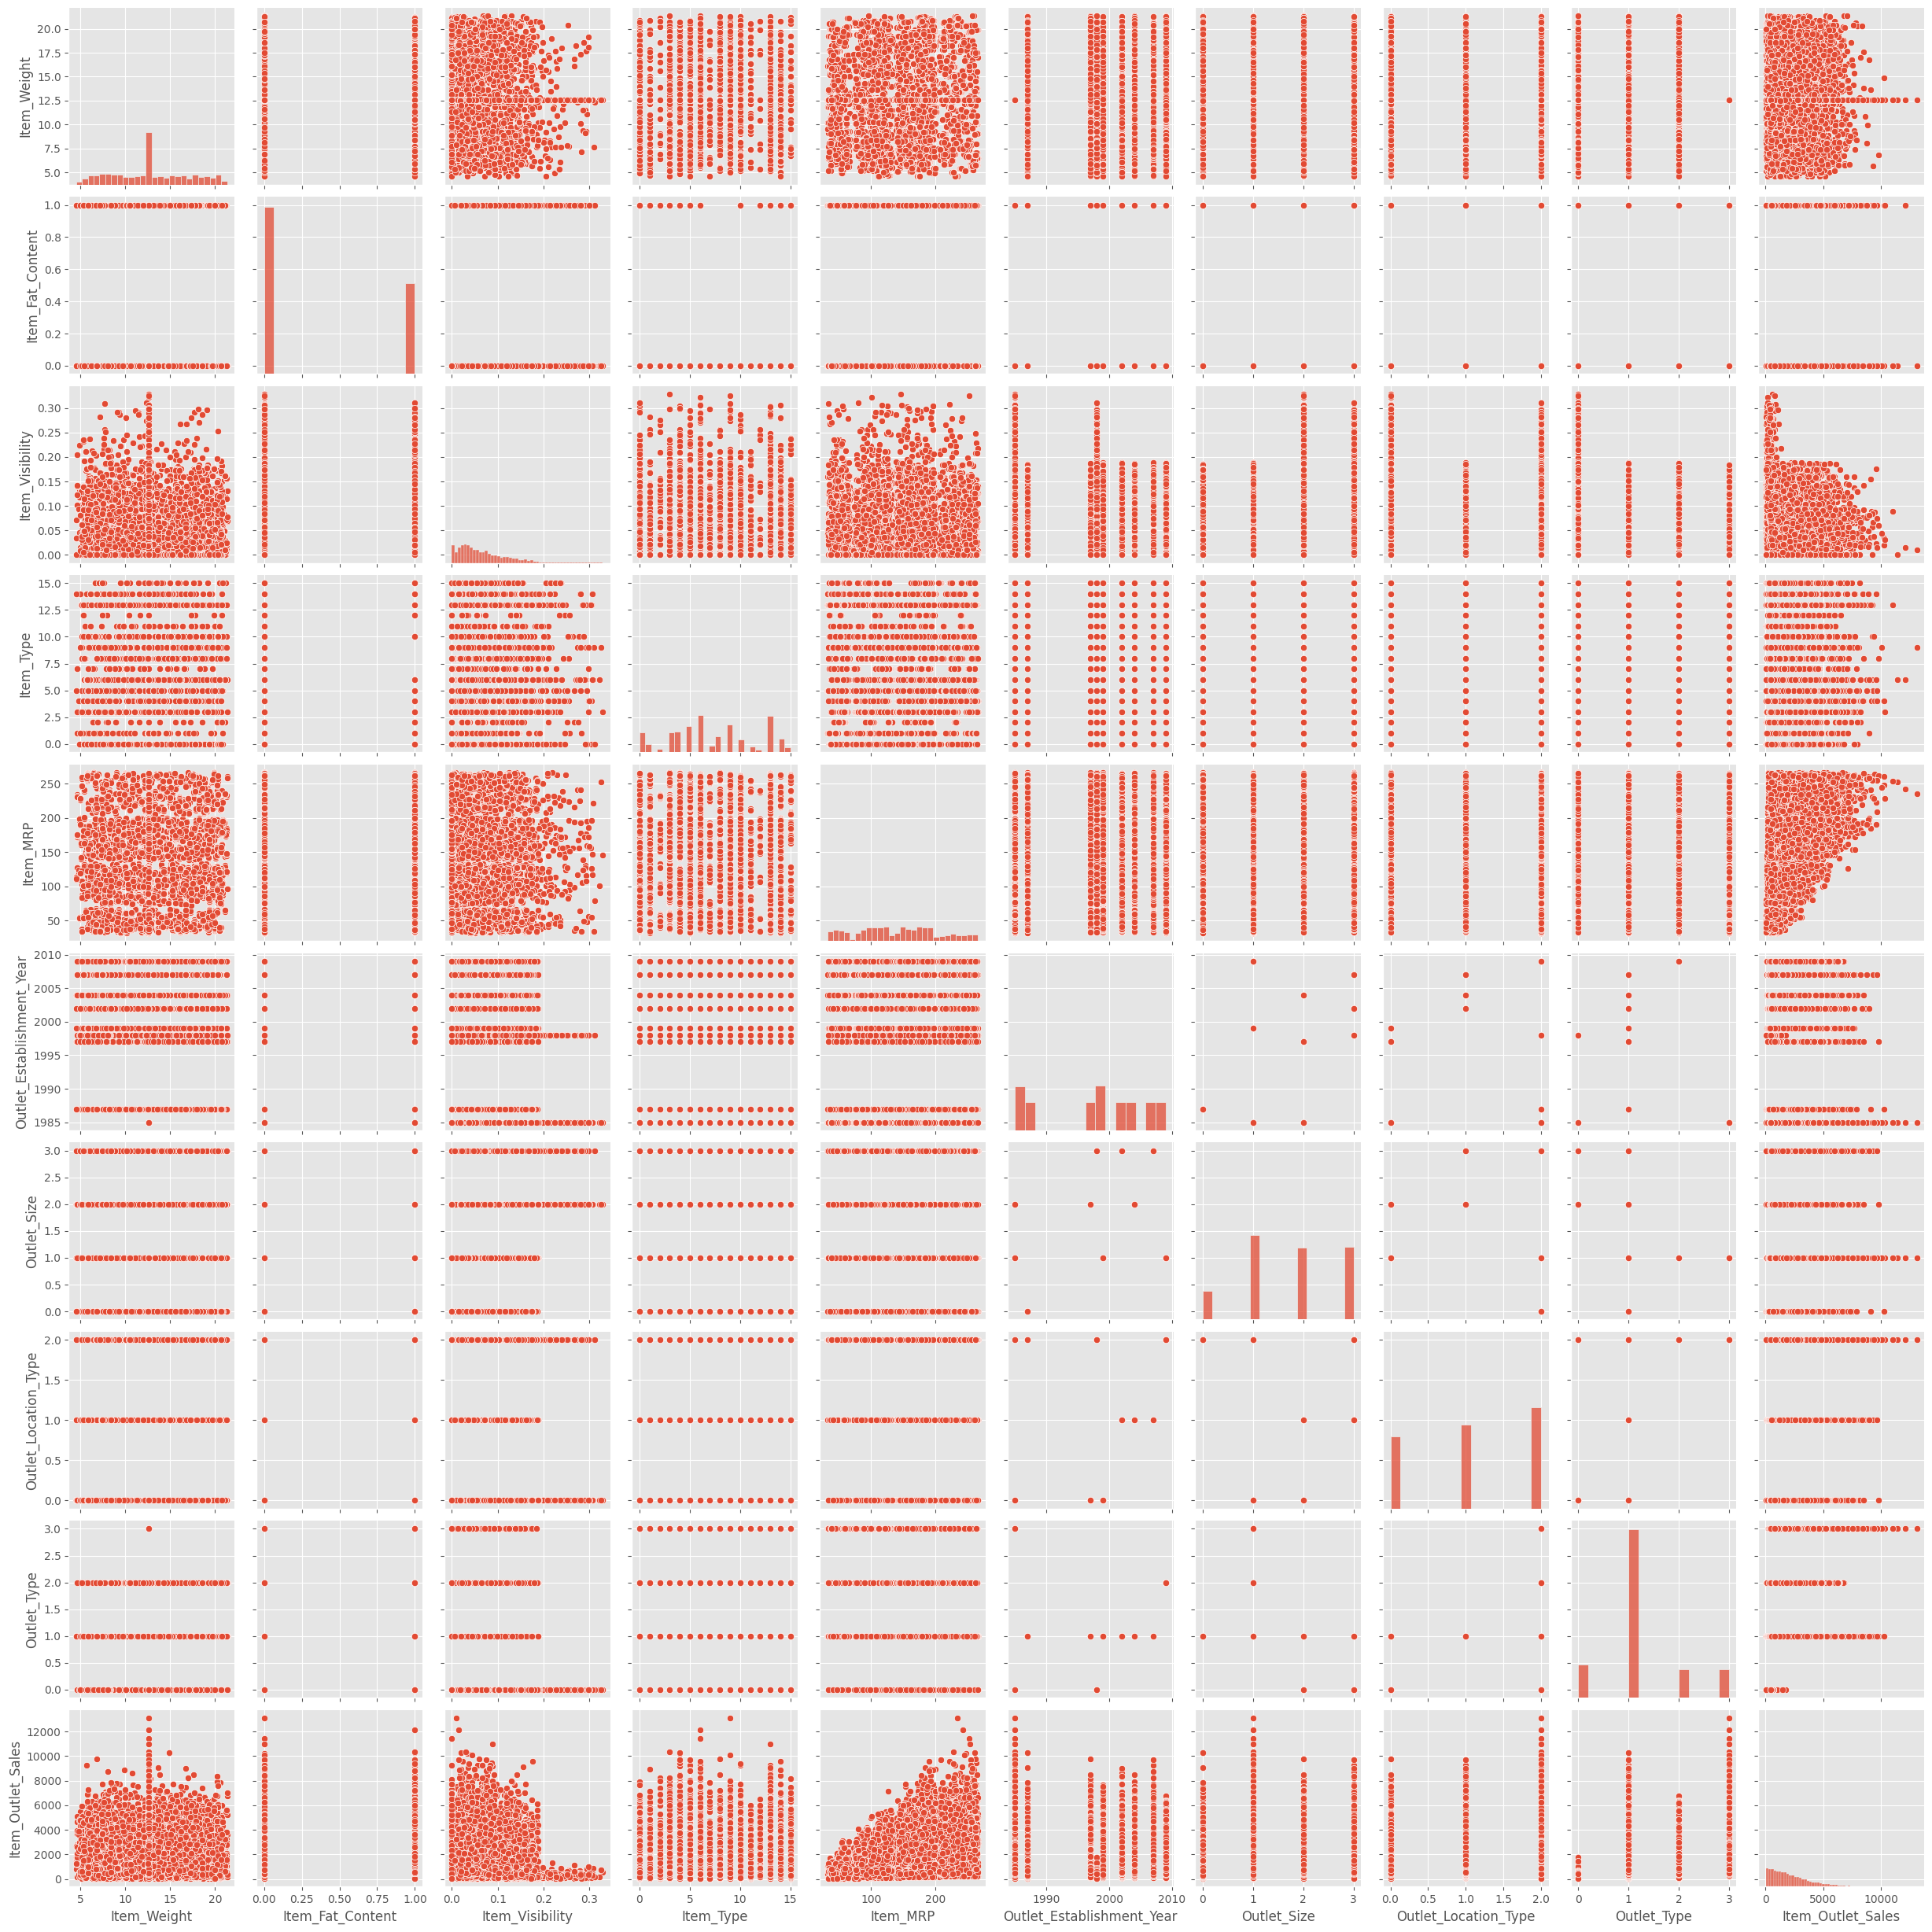

In [ ]:
sns.pairplot(df, vars=['Item_Weight',	'Item_Fat_Content',	'Item_Visibility',	'Item_Type',	'Item_MRP',
                       'Outlet_Establishment_Year',	'Outlet_Size',	'Outlet_Location_Type',	'Outlet_Type', 'Item_Outlet_Sales'])
plt.show()

In [ ]:
df_corr = df[['Item_Weight',	'Item_Fat_Content',	'Item_Visibility',	'Item_Type',	'Item_MRP',
                       'Outlet_Establishment_Year',	'Outlet_Size',	'Outlet_Location_Type',	'Outlet_Type', 'Item_Outlet_Sales']].dropna().corr()
df_corr

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Weight,1.000000,-0.021092,-0.014168,0.028038,0.024951,0.007739,-0.011120,0.001958,-0.009973,0.009693
Item_Fat_Content,-0.021092,1.000000,0.047314,-0.139434,0.006063,0.003151,-0.001365,-0.001598,0.002199,0.018719
Item_Visibility,-0.014168,0.047314,1.000000,-0.035249,-0.001315,-0.074834,0.087796,-0.028099,-0.173468,-0.128625
Item_Type,0.028038,-0.139434,-0.035249,1.000000,0.032651,0.004970,0.000827,0.003084,0.003053,0.017048
Item_MRP,0.024951,0.006063,-0.001315,0.032651,1.000000,0.005020,-0.002473,0.000232,-0.001975,0.567574
Outlet_Establishment_Year,0.007739,0.003151,-0.074834,0.004970,0.005020,1.000000,0.470343,-0.089216,-0.122304,-0.049135
Outlet_Size,-0.011120,-0.001365,0.087796,0.000827,-0.002473,0.470343,1.000000,-0.290216,-0.432062,-0.172477
Outlet_Location_Type,0.001958,-0.001598,-0.028099,0.003084,0.000232,-0.089216,-0.290216,1.000000,0.467219,0.089367
Outlet_Type,-0.009973,0.002199,-0.173468,0.003053,-0.001975,-0.122304,-0.432062,0.467219,1.000000,0.401522
Item_Outlet_Sales,0.009693,0.018719,-0.128625,0.017048,0.567574,-0.049135,-0.172477,0.089367,0.401522,1.000000


<Axes: >

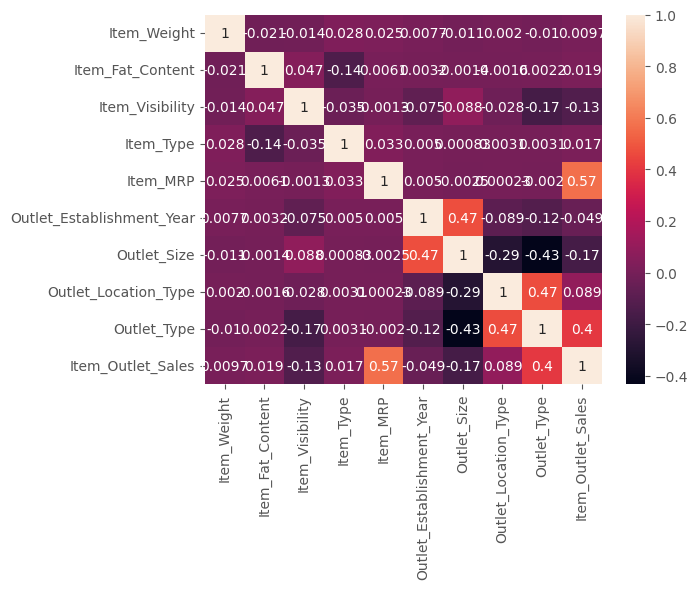

In [ ]:
sns.heatmap(df_corr, annot=True )

**Train_Test_Split**

In [ ]:
from sklearn.model_selection import train_test_split
X_train = df.iloc[:, :-1].values
y_train = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

In [ ]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model on the test set
predictions = model.predict(X_test)
rmse = mean_squared_error(y_test, predictions)**0.3
print("RMSE:", rmse)

RMSE: 69.56060530785868


In [ ]:
r2_score(y_test, predictions)

0.5058041776078954

In [ ]:
percent_accuracy = (1 - (rmse / y_test.mean())) * 100
print(f"Model Accuracy: {percent_accuracy}%")

Model Accuracy: 96.7284691567785%
